# Leyendas y colores

Cuando teníamos varias gráficas en una visualización, las hemos estado diferenciado con los colores. Sin embargo, esto se nos quedaba un poco corto en algunos casos, ya que por mucho que nosotros sepamos qué color se identifica con qué línea, si exportamos la gráfica nadie sabrá esta relación y provocará confusión. Por eso recurrimos a las leyendas, que aportan ese significado a la visualización, asignando significado a los distintos elementos de la trama.
En otros notebooks, hemos visto cómo crear una leyenda simple; en este veremos cómo personalizar la ubicación y la estética de la leyenda con Matplotlib.

La leyenda más simple se puede crear como ya hemos visto, con el comando `` plt.legend () ``, que crea automáticamente una leyenda para cualquier elemento del gráfico que hayamos etiquetado:

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')
import numpy as np

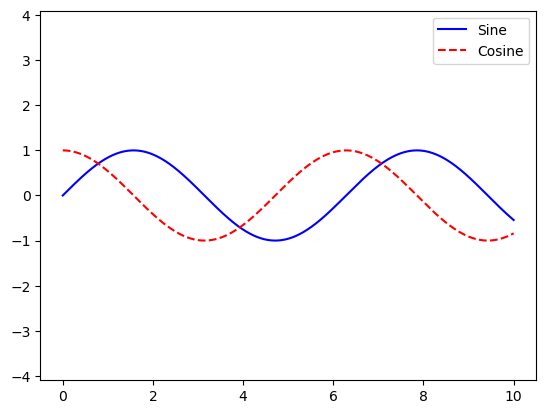

In [61]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal') # Same scale in x and y


leg = ax.legend();

¡Anda, la leyenda aparece con un marco!

Pero hay muchas más modificaciones que podemos utilizar para personalizar la leyenda de nuestra gráfica. Por ejemplo, podemos decir que no queremos marco y que la posición la queremos arriba a la izquierda:

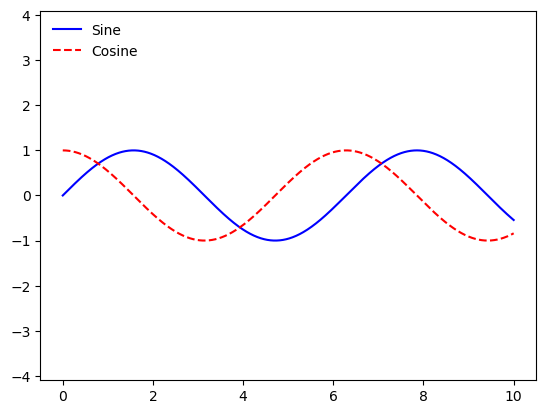

In [62]:
ax.legend(loc = 'upper left', frameon=False)
fig

Por otra parte, también podemos cambiar la forma en la que aparece, por ejemplo, cambiando el número de columnas:

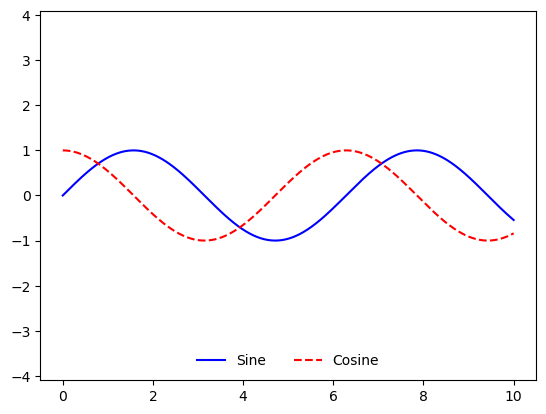

In [63]:
ax.legend(loc = 'lower center', frameon=False, ncol=2)
fig

Podíamos cambiar el marco para redondearlo (``fancybox``), añadir sombra (``shadow``), cambiar la transparencia del cuadro (``alpha``), o cambiar los márgenes del cuadro:

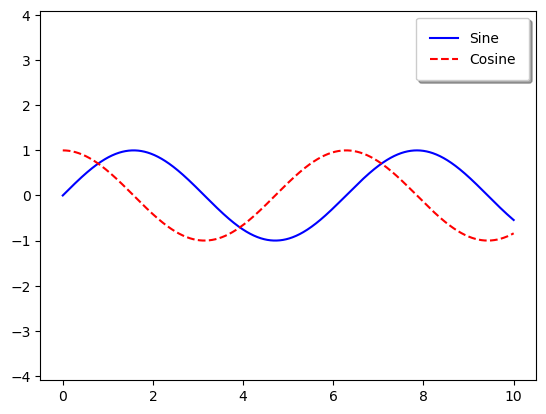

In [64]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

Y así podríamos seguir con unas cuántas opciones, las cuales podemos consultar en el docstring de ``plt.legend``.

In [65]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label st

## Eligiendo los elemento de nuestra leyenda

Como ya hemos visto, la leyenda incluye todos los elementos etiquetados por defecto.
Si esto no es lo que queremos, podemos ajustar qué elementos y etiquetas mostrar en la leyenda utilizando los objetos devueltos por las funciones de representación.

El comando `` plt.plot() `` puede crear varias líneas a la vez, y devuelve una lista con las instancias de línea creadas.
Pasando cualquiera de estas a `` plt.legend() `` nos permitirá identificarlos junto con las etiquetas que nos gustaría especificar:

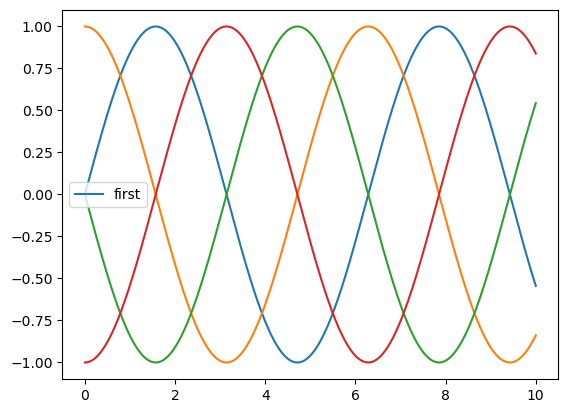

In [66]:
# Nos guardamos en una variable una matriz de 4 columnas, que se identificarán con cada línea que queremos representar. Sin embargo, podríamos
#crearlo por partes o de cualquier otra forma. Esta notación simplemente es porque nos conviene:
y = np.sin(x.reshape(len(x), 1) + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines es una lista de instancias plt.Line2D
plt.legend(lines[:1], ['first']);

En general, hacer las referencias devolviendo los objetos de las líneas y estableciendo la leyenda en base a ello, puede resultar un tanto confuso. Por ello, suele ser más sencillo hacerlo como ya lo estábamos haciendo anteriormente, estableciendo las etiquetas en cada plot:

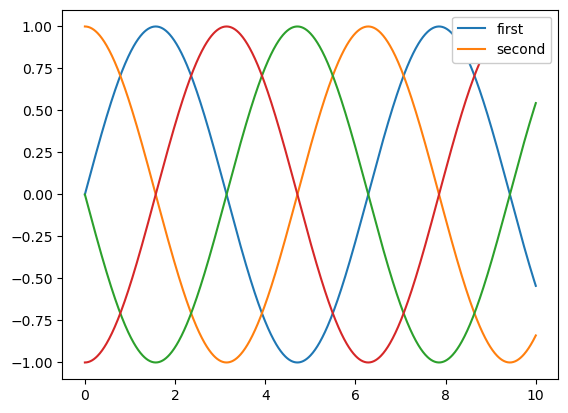

In [69]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True, loc='upper right');

Por defecto, la leyenda ignora todos loes elementos que no tengan un ``label`` asignado.

## Leyenda para el tamaño de los puntos

A veces, los valores predeterminados de la leyenda no son suficientes para la visualización dada.
Por ejemplo, podríamos estar usando el tamaño de los puntos como una dimensión más, buscando reflejar ciertas características de los datos, y queremos reflejarlo en la visualización.

A continuación, se muestra un ejemplo en el que usaremos el tamaño de los puntos para indicar las poblaciones de las ciudades de California. En él, representaremos la latitud y longitud de las ciudades de California junto con su población y área. Para las dos primeras, utilizaremos los ejes X e Y, mientras que para las otras dos utilizaremos el color y el tamaño, respectivamente. Por tanto necesitaremos utilizar una leyenda que nos indique qué significa el tamaño y el color (para lo que utilizaremos barra de color):

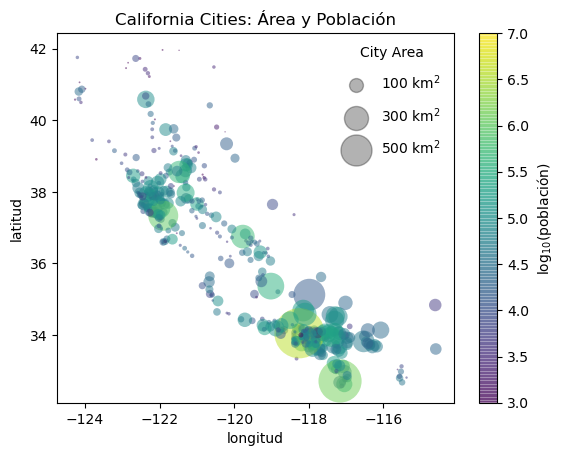

In [73]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')

# Sacamos los datos que nos interesa representar:
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Representamos los puntos usando el color y el tamaño pero sin etiquetas (además, la pobleación, como son números muy grandes, usaremos el log)
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)

plt.xlabel('longitud')
plt.ylabel('latitud')
# PAra el colormap, utilizaremos notación para ponerlo bonito
plt.colorbar(label='log$_{10}$(población)')
plt.clim(3, 7)

# Y creamos la leyenda del tamaño, para lo que haremos alguna "trampa", ya que lo que haremos será llamar 3 veces a scatter con leyenda 
#pero sin datos, para que no nos añada datos pero sí la leyenda de los valores que le pasemos:
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Área y Población');

La leyenda siempre hará referencia a algún objeto que esté en el gráfico, por lo que si queremos mostrar una forma en particular, debemos añadirla.
En este caso, los objetos que queremos (los círculos grises) no están en la visualización, por lo que hacemos esa "trampa" añadiendo la leyenda del tamaño pero sin datos, usando listas vacías.
Además, la leyenda solo menciona los elementos de la visualización que tienen una etiqueta especificada.

Al meter las listas vacías en el *scatter*, creamos objetos de representación etiquetados que son recogidos por la leyenda, y ahora nuestra leyenda nos brinda información útil.
Esta estrategia puede resultar muy útil para crear visualizaciones más sofisticadas.

Finalmente, cabe destacar que para datos geográficos como este, sería más claro si pudiéramos mostrar los límites estatales u otros elementos específicos del mapa.
Para esto, una excelente opción es el kit de herramientas del complemento Basemap de Matplotlib, que veremos mas adelante.

## Leyendas múltiples


A veces, cuando diseñamos una gráfica, nos gustaría añadir a la misma más de una leyenda.
Lamentablemente, Matplotlib no nos lo pone fácil, ya que a través de la interfaz estándar de `` legend `` solo es posible crear una única leyenda para toda la visualización.
Si intentamos crear una segunda leyenda usando `` plt.legend() `` o `` ax.legend() ``, simplemente anulará la primera.
Podemos solucionar esto creando un nuevo objeto que no habíamos visto hasta ahora, ``Legend``, que nos permitirá crear una leyenda desde cero. Luego podrmeos usar el método de bajo nivel `` ax.add_artist () `` para agregar manualmente esta nueva leyenda a la visualización, como complemento de la primera:

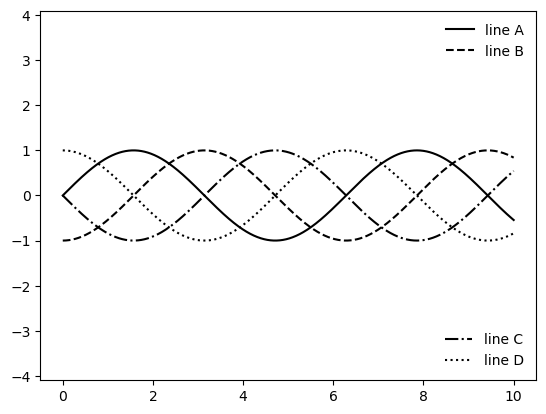

In [79]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# Especificamos las líneas y las etiquetas de la primera leyenda:
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Creamos una segunda leyenda a mano y la añadimos a la visualización:
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

Esto es una pequeña demostración de todo lo que se puede hacer a bajo nivel para personalizar nuestras visualizaciones con Matplotlib, y como tendríamos que utilizar esta librería si no hubieran diseñado la interfaz de pyplot.

# Personalizando Colorbars

Las leyendas de las gráficas identifican etiquetas discretas de puntos discretos.
Para etiquetas continuas basadas en el color de puntos, líneas o regiones, una colorbar (barra de colores) etiquetada puede ser una gran herramienta.

En Matplotlib, una colorbar es un eje separado que nos ayuda a entender el significado de los colores en un gráfico.


Como ya tenemos configurado el notebook, pasemos a la acción. En secciones anteriores, hemos creado colorbars directamente con la función ``plt.colorbar``:

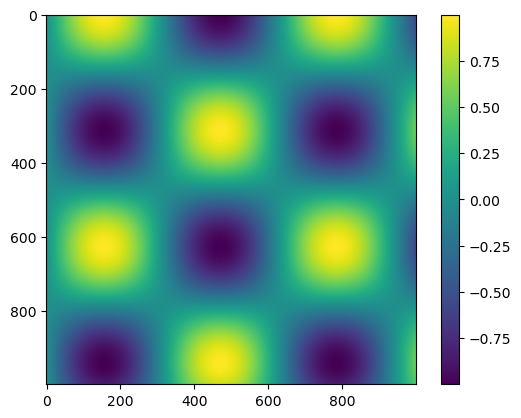

In [105]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x.reshape(len(x), 1))

plt.imshow(I)


plt.colorbar();

Ahora, veremos varias ideas para personalizar estas colorbars y usarlas efectivamente en diferentes situaciones:

El mapeo de colores (colormap) se puede especificar mediante el parámetro ``cmap`` de la función que nos creará la visualización:

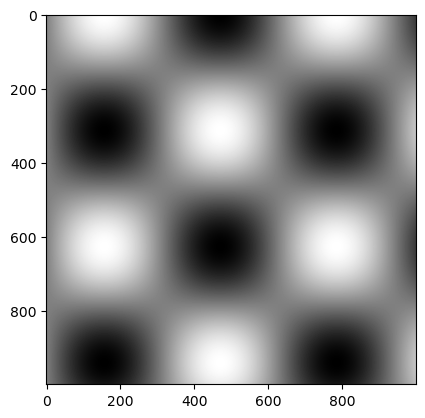

In [84]:
plt.imshow(I, cmap='gray');

Todos los colorbars disponibles los podemos ver usando el autocompletado de Python con la tecla Tabulador utilizada tras escribir ``plt.cm``:
```
plt.cm.<TAB>
```

In [ ]:
plt.cm.

Bien, ya sabemos que podemos elegit el mapa de colores de entre una gran variedad de opciones, pero esto puede ser un arma de doble filo, ya que nos podemos perder a la hora de elegir uno.

La elección resulta ser mucho más sutil de lo que cabría esperar inicialmente.

### Eligiendo el mapa de color adecuado

Como venimos diciendo desde el primer notebook de Matplotlib, tratar de abordar todas las posibilidades sería prácticamente imposible. Por ello, nos centraremos en las 3 categorías de mapas de colores más interesantes:


- **Secuenciales**: representan una secuencia continua de colores (por ejemplo, ``binary`` o ``viridis``).
- **Divergentes**: suelen representar dos colores distintos, que muestran desviaciones positivas y negativas de una media (por ejemplo, ``RdBu`` o ``PuOr``).
- **Cualitativos**: representan una mezcla de colores sin una secuencia particular (por ejemplo, ``rainbow`` o ``jet``).


El mapa de colores `` jet ``, que era el predeterminado en Matplotlib antes de la versión 2.0, es un ejemplo de un mapa de colores cualitativo.
Elegir este mapa de color como predeterminado no fue una buena opción, pues los mapas cualitativos a menudo son una mala elección para representar datos cuantitativos.
Entre los problemas que presentan está el hecho de que los mapas cualitativos no suelen mostrar una progresión uniforme en el brillo a medida que aumenta la escala.

Veámoslo con un ejemplo donde utilizaremos unas funciones específicas para convertir la barra de color `` jet `` en blanco y negro. Cabe destacar que estas funciones son única y exclusivamente para poder ejemplificar de forma visual la diferencia entre los mapas de color, no analizaremos las funciones en sí:

In [91]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Devuelve una versión de escala de grises a partir del colormap dado"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Pinta el colormap dado junto con su equivalente en escala de grises"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

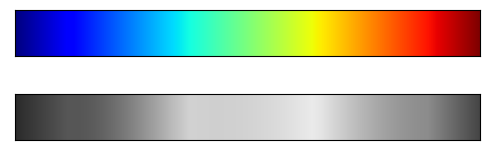

In [92]:
view_colormap('jet')

Fíjate en las franjas brillantes en la imagen en escala de grises. Incluso a todo color, este brillo desigual significa que el ojo se sentirá atraído por ciertas partes del rango de color, lo que potencialmente enfatizará partes sin importancia del conjunto de datos.

Por ello, resulta mejor usar mapas de colores como `` viridis `` (sucesor de ``jet`` como mapa de color predeterminado a partir de la versión de Matplotlib 2.0), que está diseñado específicamente para tener una variación uniforme de brillo en todo el rango.

Por lo tanto, no solo funcionará bien con nuestra percepción del color, sino que también tendrá una relación más coherente en la escala de grises:

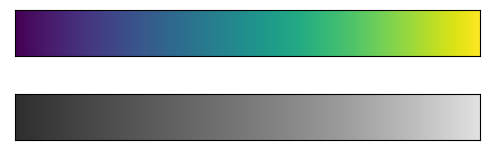

In [94]:
view_colormap('viridis')

Otra opción más colorida la podemos encontrar con los esquemas de arcoíris, que son una buena elección para datos continuos. Un ejemplo de ello es el mapa de colores `` cubehelix ``:

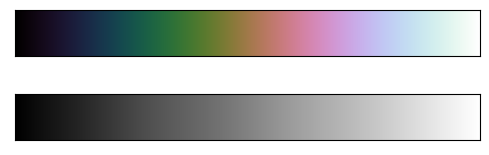

In [95]:
view_colormap('cubehelix')

Para otras situaciones, como mostrar desviaciones positivas y negativas de alguna media, las barras de color bicolores como `` RdBu `` (Red-Blue) pueden resultar útiles. Sin embargo, como se puede ver en la siguiente figura, es importante tener en cuenta que la información positiva-negativa se perderá en la traducción a escala de grises.

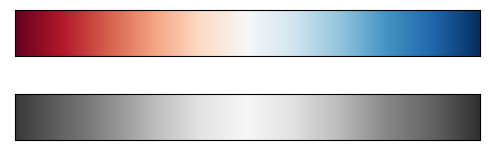

In [96]:
view_colormap('RdBu')

Veremos algunos ejemplos más del uso de algunos de estos mapas de colores a medida que avancemos.

Como hemos comentado anteriormente, hay una gran cantidad de mapas de color disponibles en Matplotlib. Para comprobarlo, te recuerdo que puedes explorar el submódulo `` plt.cm ``, donde verás una gran lista de posibilidades. Además, en el futuro veremos cómo complementar todo lo que estamos viendo con la librería Seaborn.

### Límites y extensiones de color

Matplotlib nos ofrece una amplia gama de personalización de la barra de colores. Esta barra en sí es simplemente un objeto de tipo ``plt.Axes``, por lo que podremos aplicar todos los truquillos que hemos aprendido sobre cómo manejar los ejes.

La barra de color ha sido diseñada con cierta flexibilidad para adaptarla a nuenstras visualizaciones. Por ejemplo, podríamos reducir los límites de color e indicar los valores fuera de límites con una flecha triangular en la parte superior, y otra en la inferior, estableciendo la propiedad ``extend``. Esto nos podría resultar muy útil si se muestra una imagen sujeta a ruido que nos introduzca algunos valores que nos distorsionen la maginutd real de nuestros datos:

In [98]:
speckles

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

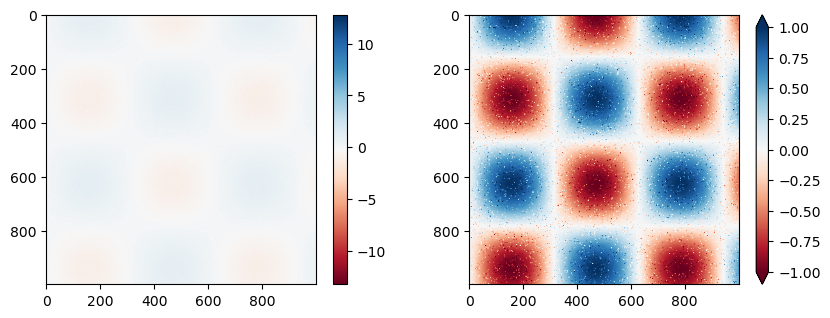

In [117]:
# Volvemos a cargar I, por si acaso (que si ejecutamos esto 2 veces cabiando cosas, se nos empieza a distorsionar):
I = np.sin(x) * np.cos(x.reshape(len(x), 1))

# Con esto metemos ruido en un 1% de los pixeles de la imagen
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both') # Triangulitos en los extremos
plt.clim(-1, 1); # Fijamos el rango de valores

Fíjate que en el panel izquierdo los límites de color predeterminados responden a los píxeles ruidosos, y el rango del ruido elimina por completo el patrón que nos interesa.
En el panel derecho, configuramos manualmente los límites de color y agregamos extensiones para indicar valores que están por encima o por debajo de esos límites.

El resultado es una visualización mucho más útil de nuestros datos.

### Barras de colores discretas

No, no nos referimos a que las barras de colores sean tímidas, sino que a veces nos insteresa que los colores que utilizamos para la representación no sigan una evolución continua, sino que formen pequeños grupos ordenados, a los que se les hará corresponder un color.

La forma más sencilla de hacer esto es con la función ``plt.cm.get_cmap()``, que pasándole el nombre de un ``cmap`` y el número de grupos que queremos hacer, hará el trabajo por nosotros:

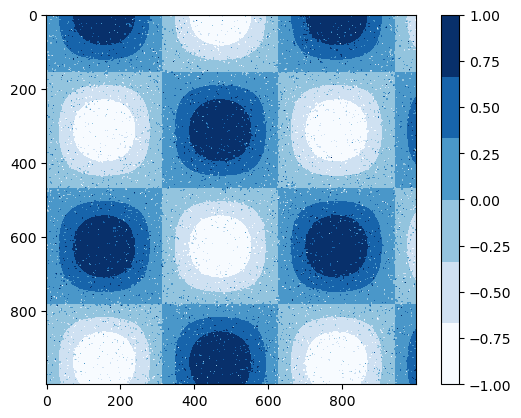

In [116]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

Como puedes observar, la versión discreta de las barras de colores puede ser utilizada al igual que cualquier otra barra de color.

## Ejemplo: Números escritos a mano

Para ver un ejemplo de dónde podríamos utilizar esto que acabamos de explicar, veamos el siguiente ejemplo, donde estudiaremos unos dígitos escritos a mano.
Estos datos se incluyen en la librería Scikit-Learn (sklearn) y constan de casi 2000 miniaturas de $8 x 8$ que muestran varios dígitos escritos a mano.

Comencemos leyendo los datos de los dígitos y visualizando varias de las imágenes de ejemplo con `` plt.imshow () ``:

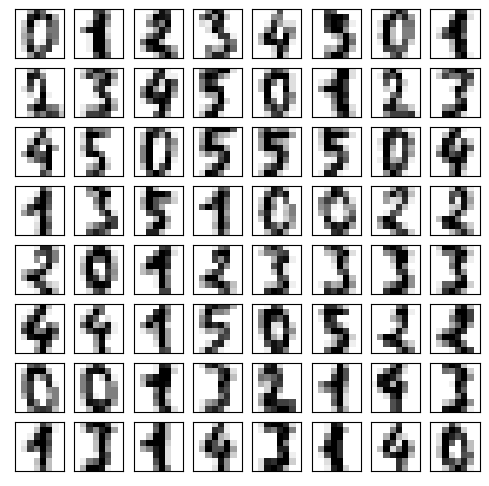

In [133]:
# Leemos los datos de los dígitos del 0 al 5 y mostramos algunos de ellos:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

Debido a que cada dígito se define por el brillo (en la escala de grises) de sus 64 píxeles, podemos considerar que cada dígito es un punto que se encuentra en un espacio de 64 dimensiones: donde cada dimensión representa el brillo de un píxel.

Pero visualizar relaciones en espacios de dimensiones tan elevadas puede resultar extremadamente difícil.
Por ello, una forma de abordar esto es utilizar una técnica de *reducción de dimensionalidad* (que ya discutiremos más adelante) como el aprendizaje múltiple para reducir la dimensionalidad de los datos manteniendo las relaciones de interés.

In [134]:
# Gracias a la reducción de dimensionalidad, podremos proyectar las 64 dimensiones en solo 2 usando IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

Y ahora, el motivo de usar este ejemplo, representar, sobre una gráfica de dos dimensiones (que nos reducen las otras 64), una tercera dimensión que nos permita representar el número al que pertenecen. Para ello, seleccionamos los grupos (``ticks``) y el límite (``clim``) para mejorar la estética de nuestra colorbar:

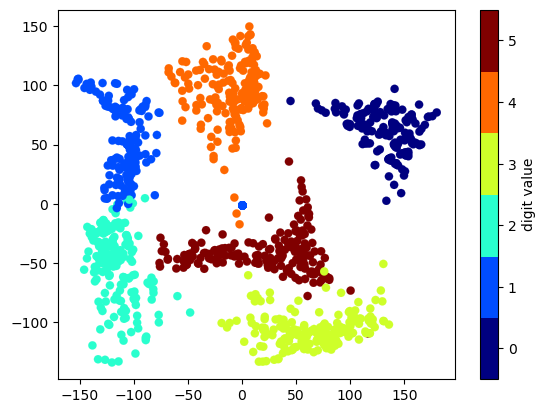

In [265]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('jet', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

La proyección también nos da algunas ideas interesantes sobre las relaciones dentro del conjunto de datos: por ejemplo, los rangos de 5 y 3 casi se superponen en esta proyección, lo que indica que algunos 5 y 3 escritos a mano son difíciles de distinguir y, por lo tanto, es más probable que se confundan mediante un algoritmo de clasificación.

Otros valores, como 0 y 1, están más distantes y, por lo tanto, es mucho menos probable que se confundan.
Esta observación concuerda con nuestra intuición, porque 5 y 3 se parecen mucho más que 0 y 1.

En este ejemplo hemos usado conceptos complejos de Machine Learning que detallaremos en el futuro, por lo que ahora no nos debemos preocupar más que por el tema visual.

## Ejercicio

Este apartado no tiene nada más allá que jugar con las leyendas y los colores, por lo que los ejercicios que se plantean a continuación son simplemente para usar lo que acabamos de ver, ya que todo esto lo iremos poniendo en práctica en los ejercicios venideros:
1. Lee el dataset de los coches y elimina cualquier registro nulo
2. Representa una gráfica donde los ejes X e Y sean "wt" y "qsec", respectivamente. Además, añadele la otra dimensión que identifique "gears" y represéntalo mediante el tamaño. Por último, también nos interesará ver "mpg", añádelo cambiando el color en función de esta cuarta dimensión con un colorbar.
3. Añade algunos detalles para que quede bonito: ponle título ("Cars analysis", por ejemplo), nombres a los ejes X e Y, añade una leyenda que identifique el tamaño de cada punto en rangos de 2, 4 y 6 para la variable "gears"; y asegúrate de que haya un colorbar que identifique qué significa cada color. 
4. Si lo representas como se indica en el apartado 2, puede que los tamaños no se ajusten bien. Tendremos que ingeniárnoslas para que se represente más grande, pero manteniendo los valores de la leyenda. ¿Se te ocurre cómo? Pista: si añades algún factor de escala en el ``scatter`` de arriba, también deberás hacerlo en el ``scatter`` de abajo.

In [249]:
import pandas as pd
import numpy as np

df = pd.read_csv("coches.csv")
df = df.dropna()
df.iloc[:2]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


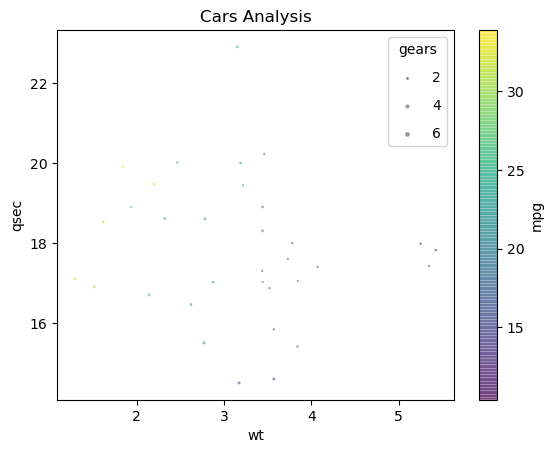

In [250]:
# Sacamos los datos que nos interesa representar:
wt, qsec = df['wt'], df['qsec']
gear, mpg = df['gear'], df['mpg']

# Representamos los puntos usando el color y el tamaño pero sin etiquetas (además, la pobleación, como son números muy grandes, usaremos el log)
plt.scatter(wt, qsec, label=None,
            c=mpg, cmap='viridis',
            s=gear, linewidth=0, alpha=0.5)

plt.xlabel('wt')
plt.ylabel('qsec')

plt.colorbar(label='mpg')
# plt.clim(10, 34)

for gear in [2, 4, 6]:
    plt.scatter([], [], c='k', alpha=0.3, s=gear,
                label=str(gear))
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='gears')

plt.title('Cars Analysis');

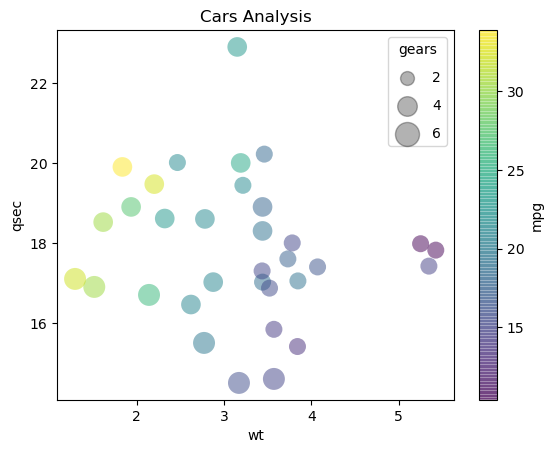

In [251]:
# Sacamos los datos que nos interesa representar:
wt, qsec = df['wt'], df['qsec']
gear, mpg = df['gear'], df['mpg']

# Representamos los puntos usando el color y el tamaño pero sin etiquetas (además, la pobleación, como son números muy grandes, usaremos el log)
plt.scatter(wt, qsec, label=None,
            c=mpg, cmap='viridis',
            s=50*gear, linewidth=0, alpha=0.5)

plt.xlabel('wt')
plt.ylabel('qsec')

plt.colorbar(label='mpg')
# plt.clim(10, 34)

for gear in [2, 4, 6]:
    plt.scatter([], [], c='k', alpha=0.3, s=50*gear,
                label=str(gear))
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='gears')

plt.title('Cars Analysis');

## Ejercicio 2

Ahora vamos a probar con otro gráfico, pero aplicado a jugadores de fútbol:
1. Lee el dataset "FIFA20.csv" y quita los nulos que tenga
2. Créate una columna nueva ("years") que indique los años que tendrá cada jugador al terminar este año y quédate con los que finalizarán este año con 24 o menos
3. Crea otra columna ("pot_diff") que sea la diferencia del "potential" - "overall". Utilízala para crearte una nueva ("eur_diff") que saque la relación entre el salario ("wage_eur") y la diferencia de potencial ("pot_diff")
4. Filtra el DataFrame para quedarte sólo con los jugadores de "team_position" en ['CF', 'CM', 'CB', 'GK'], y créate otra columna numérica más  ("position") cuyos valores sean 4, 3, 2 o 1, respectivamente, en función de las posiciones que has filtrado. Es decir, si es "CF" valdrá 4, y si es "GK" valdrá 1.
5. Representa en los ejes X e Y las variables "years" y "pot_diff", y añade el color para identificar la posición numérica que acabas de mapear. Elige bien el colormap (prueba unos cuántos para investigar un poco).

In [362]:
# 1. 
df = pd.read_csv("FIFA20.csv")
df = df.dropna()

# 2. 
df['years'] = df['dob'].apply(lambda x: 2020 - int(x[:4]))
df = df[df['years']<=24]

# 3. 
df['pot_diff'] = df['potential'] - df['overall']
df['eur_diff'] = df['wage_eur'] / df['pot_diff']

# 4. 
df = df[df['team_position'].isin(['CF', 'CM', 'CB', 'GK'])]
dic_position = {"CF": 4, "CM": 3, "CB": 2, "GK": 1}
df['position'] = df['team_position'].apply(lambda x: dic_position[x])

# Muestra del df:
df.iloc[:2]

,short_name,long_name,dob,club,overall,potential,value_eur,wage_eur,team_position,preferred_foot,influencer,years,pot_diff,eur_diff,position
74,G. Donnarumma,Gianluigi Donnarumma,1999-02-25,Milan,85,92,41500000,34000,GK,Right,False,21,7,4857.142857,1
245,Rúben Neves,Rúben Diogo da Silva Neves,1997-03-13,Wolverhampton Wanderers,82,87,29000000,89000,CM,Right,False,23,5,17800.000000,3


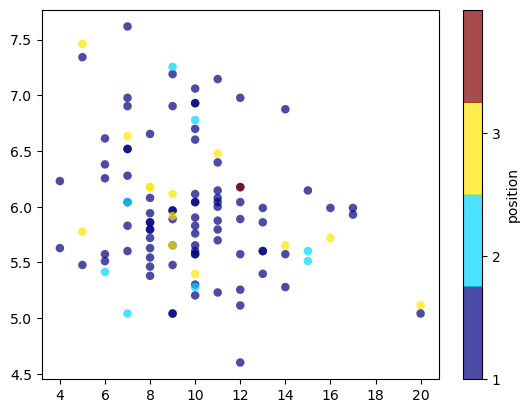

In [363]:
plt.scatter(df['pot_diff'], np.log10(df['value_eur']), lw=0.1, alpha=0.7,
            c=df['position'], cmap=plt.cm.get_cmap('jet', 4))
plt.colorbar(ticks=range(4), label='position');